<a href="https://colab.research.google.com/github/Serurays/Pokemon_Speed_Regressin_Model/blob/main/Pokemon_Speed_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load the Dataset**

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d abcsds/pokemon
!unzip pokemon.zip

  0% 0.00/14.9k [00:00<?, ?B/s]
100% 14.9k/14.9k [00:00<00:00, 26.4MB/s]
Archive:  pokemon.zip
  inflating: Pokemon.csv             


In [ ]:
import pandas as pd

original_df = pd.read_csv("Pokemon.csv")

In [ ]:
original_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# **Select Features**

In [ ]:
modified_df = original_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

modified_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


# **Split into 3 Partitions: Train, Val, Test**

In [ ]:
shuffled_df = modified_df.sample(frac=1)

train_df = shuffled_df[:500]
val_df = shuffled_df[500:650]
test_df = shuffled_df[650:]

In [ ]:
len(train_df), len(val_df), len(test_df)

(500, 150, 150)

In [ ]:
X_train, y_train = train_df.to_numpy()[:, :-1], train_df.to_numpy()[:, -1]

In [ ]:
X_val, y_val = val_df.to_numpy()[:, :-1], val_df.to_numpy()[:, -1]

In [ ]:
X_test, y_test = test_df.to_numpy()[:, :-1], test_df.to_numpy()[:, -1]

In [ ]:
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((500, 5), (500,)), ((150, 5), (150,)), ((150, 5), (150,)))

# **Preprocess the Inputs**

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: >]], dtype=object)

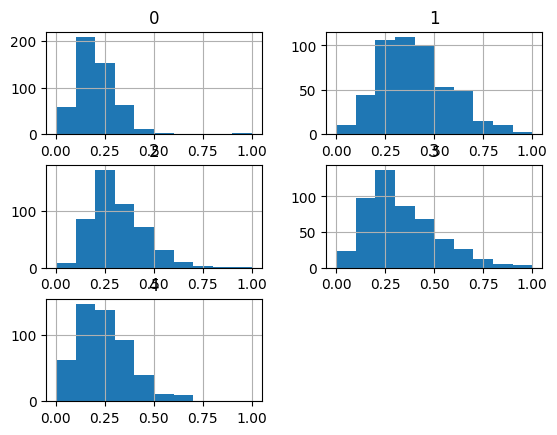

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)

X_train_scaled, X_val_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_val), scaler.transform(X_test)

pd.DataFrame(X_train_scaled).hist()

# **Pick the Best Model w/ Lowest Validation Error**

In [ ]:
from sklearn.metrics import mean_absolute_error

average_speed = y_train.mean()
average_speed

67.406

In [ ]:
mean_absolute_error(y_val, [average_speed] * len(y_val))

25.275840000000002

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(X_train, y_train)

mean_absolute_error(y_val, linear_model.predict(X_val))

20.179159218838663

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor().fit(X_train, y_train)

mean_absolute_error(y_val, random_forest.predict(X_val))

19.224072222222222

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam

model_1 = Sequential([layers.Input((5,)),
                      layers.Dense(1)])

model_1.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_1.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 19ms/step - loss: 1897.8873 - mean_absolute_error: 33.9228 - val_loss: 1247.3588 - val_mean_absolute_error: 27.6207
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1485.6028 - mean_absolute_error: 28.9508 - val_loss: 1154.0337 - val_mean_absolute_error: 26.5908
Epoch 3/100
16/16 [==============================] - 0s 6ms/step - loss: 1292.6116 - mean_absolute_error: 27.7110 - val_loss: 1056.3782 - val_mean_absolute_error: 25.4674
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 1157.3037 - mean_absolute_error: 26.1015 - val_loss: 940.0399 - val_mean_absolute_error: 24.2677
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 1029.4796 - mean_absolute_error: 24.8785 - val_loss: 898.4042 - val_mean_absolute_error: 23.7168
Epoch 6/100
16/16 [==============================] - 0s 9ms/step - loss: 928.4615 - mean_absolute_error: 23.8144 - val_loss: 825.5845 - val_mean_a

In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2 = Sequential([layers.Input((5,)),
                      layers.Dense(32),
                      layers.Dense(32),
                      layers.Dense(1)])

model_2.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error'])

model_2.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 1s 15ms/step - loss: 1783.2778 - mean_absolute_error: 33.7961 - val_loss: 1087.8314 - val_mean_absolute_error: 26.2910
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 773.2996 - mean_absolute_error: 21.7068 - val_loss: 817.2656 - val_mean_absolute_error: 22.2229
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 693.6707 - mean_absolute_error: 20.9243 - val_loss: 766.6357 - val_mean_absolute_error: 21.4121
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 646.5242 - mean_absolute_error: 20.4185 - val_loss: 717.6276 - val_mean_absolute_error: 20.8034
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 640.2332 - mean_absolute_error: 20.2920 - val_loss: 756.6440 - val_mean_absolute_error: 21.4699
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 713.2478 - mean_absolute_error: 21.4355 - val_loss: 807.3074 - val_mean_absolut

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                192       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1281 (5.00 KB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Evaluate the Chosen Model**

In [ ]:
mean_absolute_error(y_test, linear_model.predict(X_test))

19.06562139534031